1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [2]:
import pandas as pd 
import numpy as np
import datetime as dt
#ORBIT_CNT=hours,BX_COUNTER=minutes,TDC_MEAS=seconds

file_name = "./data/data_000637.txt"
data = pd.read_csv(file_name)
N=1000000

data = data.loc[:N ,:]
data


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
999996,1,0,51,3869209011,2561,12
999997,1,0,61,3869209011,2562,2
999998,1,0,50,3869209011,2563,4
999999,1,0,60,3869209011,2688,25


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [3]:
column = data["BX_COUNTER"]
x = column.max()+1
print(x)

3564


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [23]:
import pandas as pd 
import datetime
import datetime as dt

file_name = "./data/data_000637.txt"
pandas_dataframe= pd.read_csv(file_name)

absolute_times=[]
for a,row in pandas_dataframe.iterrows():
    timing= (row["TDC_MEAS"]+ row["BX_COUNTER"]+ row["ORBIT_CNT"])
    absolute_times.append(timing)

pandas_dataframe["ABS_TIMES"]=absolute_times
print("NEW COLUMN \n",pandas_dataframe)

time_series=pd.to_datetime(pandas_dataframe["ABS_TIMES"], unit="ns")
print("TIME SERIES \n",time_series)

NEW COLUMN 
          HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS   ABS_TIMES
0           1     0          123  3869200167        2374        26  3869202567
1           1     0          124  3869200167        2374        27  3869202568
2           1     0           63  3869200167        2553        28  3869202748
3           1     0           64  3869200167        2558        19  3869202744
4           1     0           64  3869200167        2760        25  3869202952
...       ...   ...          ...         ...         ...       ...         ...
1310715     1     0           62  3869211171         762        14  3869211947
1310716     1     1            4  3869211171         763        11  3869211945
1310717     1     0           64  3869211171         764         0  3869211935
1310718     1     0          139  3869211171         769         0  3869211940
1310719     1     0           61  3869211171         762        18  3869211951

[1310720 rows x 7 columns]
TIME SERIES

4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [19]:
import pandas as pd 
file_name = "./data/data_000637.txt"
pandas_dataframe= pd.read_csv(file_name)
absolute_times=[]
for a,row in pandas_dataframe.iterrows():
    timing= (row["TDC_MEAS"]+ row["BX_COUNTER"]+ row["ORBIT_CNT"])
    absolute_times.append(timing)

pandas_dataframe["ABS_TIME"]= pd.to_timedelta(absolute_times)
print("DURATION ==>>\n",pandas_dataframe.head(30))

DURATION ==>>
     HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0      1     0          123  3869200167        2374        26   
1      1     0          124  3869200167        2374        27   
2      1     0           63  3869200167        2553        28   
3      1     0           64  3869200167        2558        19   
4      1     0           64  3869200167        2760        25   
5      1     0           63  3869200167        2762         4   
6      1     0           61  3869200167        2772        14   
7      1     0          139  3869200167        2776         0   
8      1     0           62  3869200167        2774        21   
9      1     0           60  3869200167        2788         7   
10     1     1            7  3869200167        2785         4   
11     1     0           64  3869200167        2786        19   
12     1     1            6  3869200167        2792        18   
13     1     0           36  3869200167        2791        23   
14     1  

5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [18]:
data_grouped = data.groupby("TDC_CHANNEL").count()
data_grouped = data_grouped.sort_values(by="HEAD",ascending=False) 
print(data_grouped.index[0:3])

Int64Index([139, 64, 63], dtype='int64', name='TDC_CHANNEL')


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [20]:
print("number of unique orbits:",data["ORBIT_CNT"].unique().shape[0])

number of unique orbits: 8841


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [21]:
print("number of unique orbits with at least one measurement with TDC_CHANNEL=139:",data[data["TDC_CHANNEL"]==139]["ORBIT_CNT"].unique().shape[0])

number of unique orbits with at least one measurement with TDC_CHANNEL=139: 8816


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [22]:
FPGA_0 = pd.Series(data[data['FPGA'] == 0]['TDC_CHANNEL'].value_counts())
FPGA_1 = pd.Series(data[data['FPGA'] == 1]['TDC_CHANNEL'].value_counts())
print("Series 1:", FPGA_0)
print("\nSeries 2", FPGA_1)

Series 1: 139    57878
64     49109
63     48604
61     37208
62     36778
       ...  
130       24
137       23
30         3
129        2
39         1
Name: TDC_CHANNEL, Length: 124, dtype: int64

Series 2 2      24871
139    24799
1      21622
4      20087
3      16725
       ...  
9         65
130       29
138       27
137       27
129       26
Name: TDC_CHANNEL, Length: 132, dtype: int64


9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

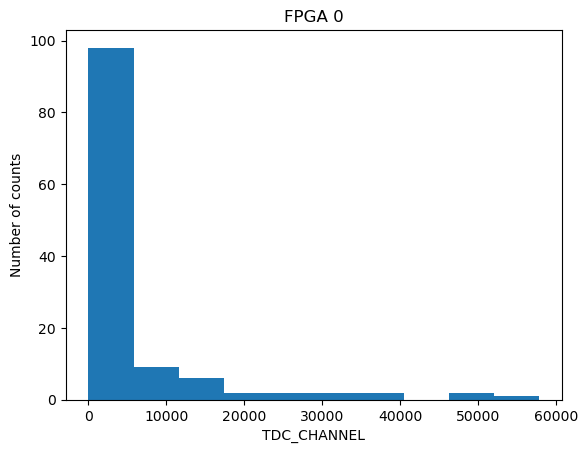

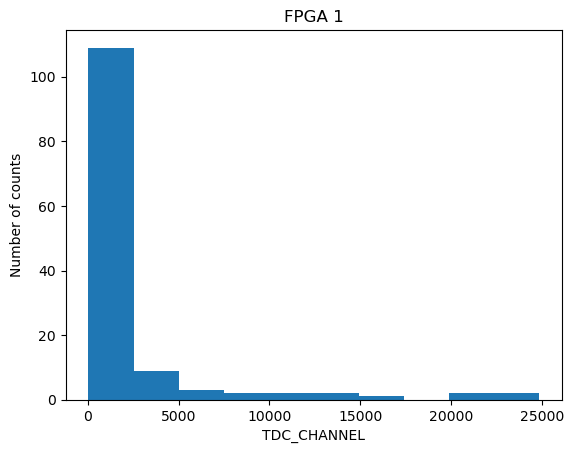

In [15]:
import matplotlib.pyplot as plt

plt.hist(FPGA_0)
plt.title('FPGA 0')
plt.xlabel('TDC_CHANNEL')
plt.ylabel('Number of counts')
plt.show()
print("\n")
plt.hist(FPGA_1)
plt.title('FPGA 1')
plt.xlabel('TDC_CHANNEL')
plt.ylabel('Number of counts')
plt.show()